In [1]:
# Importing essential libraries
import pandas as pd

import numpy as np
import seaborn as sns 

In [2]:
df=pd.read_csv("ipl.csv")

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
# --- Data Cleaning ---
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [5]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [6]:
# Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [7]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [8]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

In [9]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [10]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [11]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [12]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [13]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [14]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [15]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [16]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error,r2_score


In [18]:
result=regressor.predict(X_test)

In [19]:
mean_squared_error(result,y_test)

251.66534221404058

In [20]:
r2_score(result,y_test)

0.6145358726561359

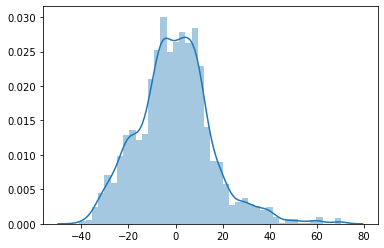

In [21]:
sns.distplot(result-y_test)

In [22]:
from sklearn.linear_model import LogisticRegression,Ridge,Lasso

In [23]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [24]:
from sklearn.ensemble import GradientBoostingRegressor


In [25]:
import xgboost


In [26]:
rfc=RandomForestClassifier()

In [27]:
svc=SVC()

In [28]:
knn=KNeighborsClassifier()

In [29]:
dt=DecisionTreeClassifier()

In [30]:
nb=GaussianNB()

In [31]:
lr=LogisticRegression()

In [32]:
ls=Lasso()

In [33]:
r=Ridge()

In [34]:
model=[("rfc",rfc),("svc",svc),("knn",knn),("dt",dt),("nb",nb),("lr",lr)]

In [35]:
vt=VotingClassifier(estimators=model)

In [36]:
xg=xgboost.XGBRegressor()

In [37]:
gbr=GradientBoostingRegressor()

In [38]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
svc.fit(X_train,y_train)

SVC()

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [41]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
nb.fit(X_train,y_train)

GaussianNB()

In [43]:
lr.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [44]:
ls.fit(X_train,y_train)

Lasso()

In [45]:
r.fit(X_train,y_train)

Ridge()

In [46]:
vt.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('rfc', RandomForestClassifier()), ('svc', SVC()),
                             ('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('lr', LogisticRegression())])

In [47]:
xg.fit(X_train,y_train)

[01:31:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [48]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [49]:
result1=rfc.predict(X_test)

In [50]:
result2=svc.predict(X_test)

In [51]:
result3=knn.predict(X_test)

In [52]:
result4=dt.predict(X_test)

In [53]:
result5=nb.predict(X_test)

In [54]:
result6=lr.predict(X_test)

In [55]:
result7=ls.predict(X_test)

In [56]:
result8=r.predict(X_test)

In [57]:
result9=vt.predict(X_test)

In [58]:
result10=xg.predict(X_test)

In [59]:
result11=gbr.predict(X_test)

In [60]:
result=[result1,result2,result3,result4,result5,result6,result7,result8,result9,result10,result11]


In [61]:
for i in result :#using this code we can get best aglo to apply on y dataset 
    a=mean_squared_error(i,y_test)
    
    b=r2_score(i,y_test)
    
    print(a)
    print(b)
    print(b>0.50)
    
    
    

863.0140388768898
-0.12361535064032081
False
583.065154787617
-0.5544345276584628
False
636.1400287976962
0.24658162878838208
False
838.7980561555075
-0.19693728363188545
False
1910.2541396688264
-0.22286301550247245
False
374.0370770338373
0.28975921455759657
False
262.3797366400714
0.5832655067595849
True
251.00850756690335
0.6178647877837666
True
980.8902087832973
-0.19760088926519326
False
288.16571383075734
0.4922144070661588
False
277.95328337791216
0.5141330860144409
True


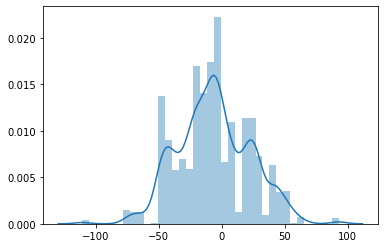

In [62]:
sns.distplot(result1-y_test)

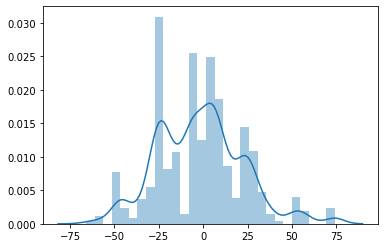

In [63]:
sns.distplot(result2-y_test)

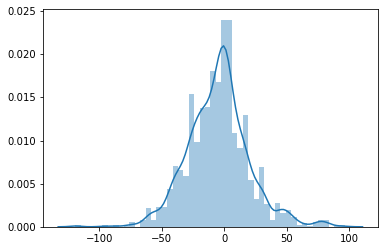

In [64]:
sns.distplot(result3-y_test)

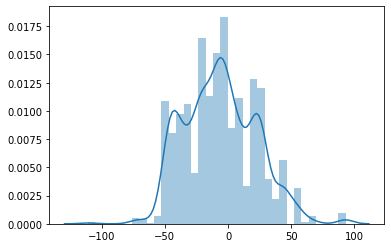

In [65]:
sns.distplot(result4-y_test)

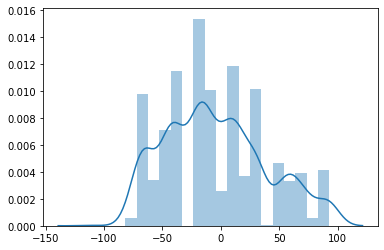

In [66]:
sns.distplot(result5-y_test)

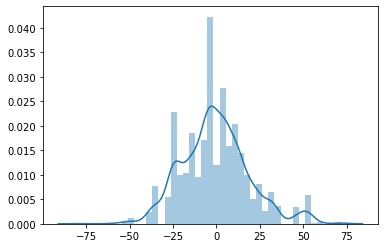

In [67]:
sns.distplot(result6-y_test)

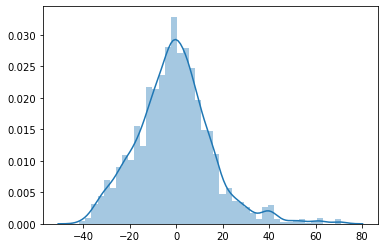

In [68]:
sns.distplot(result7-y_test)

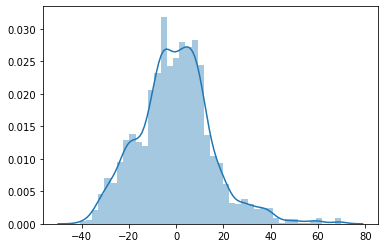

In [69]:
sns.distplot(result8-y_test)

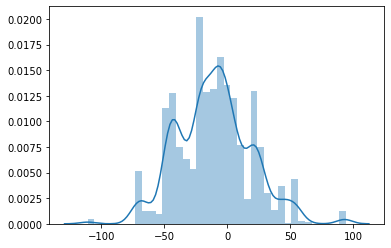

In [70]:
sns.distplot(result9-y_test)

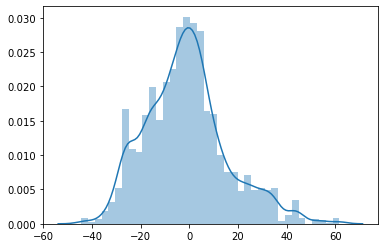

In [71]:
sns.distplot(result10-y_test)

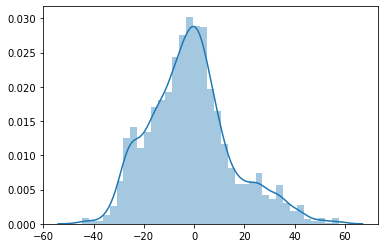

In [72]:
sns.distplot(result11-y_test)

In [78]:

while True:
    print("Do u want to predict todays match score y/n")
    i=input("enter y/n")
    if i=="y":
        team1=[]
        team2=[]
        arr=[]
        print('Chennai Super Kings ')
        print('Delhi Daredevils  ' )
        print('Kings XI Punjab ')
        print('Kolkata Knight Riders ')
        print('Mumbai Indians ')
        print('Rajasthan Royals ')
        print('Royal Challengers Bangalore')
        print('Sunrisers Hyderabad ')
        batting=input("Enter batting teams name ")
        if batting =="Chennai Super Kings":
            team1.extend([1,0,0,0,0,0,0,0])
        elif batting =="Delhi Daredevils":
            team1.extend([0,1,0,0,0,0,0,0])
        elif batting=="Kings XI Punjab":
            team1.extend([0,0,1,0,0,0,0,0])
        elif batting== "Kolkata Knight Riders":
            team1.extend([0,0,0,1,0,0,0,0])
        elif batting=="Mumbai Indians ":
            team1.extend([0,0,0,0,1,0,0,0])
        elif batting =="Rajasthan Royals":
            team1.extend([0,0,0,0,0,1,0,0])
        elif batting=="Royal Challengers Bangalore":
            team1.extend([0,0,0,0,0,0,1,0])
        elif batting=="Sunrisers Hyderabad ":
            team1.extend([0,0,0,0,0,0,0,1])
            
        bowling =input("Enter bowling teams name")
        if bowling =="Chennai Super Kings":
            team2.extend([1,0,0,0,0,0,0,0])
        elif bowling =="Delhi Daredevils":
            team2.extend([0,1,0,0,0,0,0,0])
        elif bowling=="Kings XI Punjab":
            team2.extend([0,0,1,0,0,0,0,0])
        elif bowling== "Kolkata Knight Riders":
            team2.extend([0,0,0,1,0,0,0,0])
        elif bowling=="Mumbai Indians ":
            team2.extend([0,0,0,0,1,0,0,0])
        elif bowling =="Rajasthan Royals":
            team2.extend([0,0,0,0,0,1,0,0])
        elif bowling=="Royal Challengers Bangalore":
            team2.extend([0,0,0,0,0,0,1,0])
        elif bowling=="Sunrisers Hyderabad ":
            team2.extend([0,0,0,0,0,0,0,1])
        
        arr.extend(team1)
        
        arr.extend(team2)    
        
        over=float(input("No of overs"))
        runs=int(input("No of runs"))
        wickets=int(input("No of wickets"))
        run_in_prev_5=int(input("run_in_prev_5"))
        wicket_in_prev_5=int(input("wicket_in_prev_5"))
        arr.extend([over,runs,wickets,run_in_prev_5,wicket_in_prev_5])
        data=np.array([arr])
        my_prediction=gbr.predict(data)
        print(int(my_prediction))
        print("Score range from min to max")
        print(int(min(my_prediction)))
        print(int(max(my_prediction)))
    
    
    else:
        break
        

Do u want to predict todays match score y/n
enter y/nn
